In [151]:
import numpy as np
import matplotlib.pyplot as plt
from subpix_signals import subpix_signals
import gpu_tracking as gt
import trackpy as tp
import os
from pathlib import Path
import pandas as pd


shape = np.array([512, 512])
n_parts = 20
bg = np.random.normal(size = shape).astype("float32")*50 + 1000
pic = bg.copy()
# pic = np.zeros(shape, dtype = "float32")
parts = np.random.uniform(size = (n_parts, 2))
parts = parts*(shape - 1).reshape(-1, 2)
intensities = 1500
pic = subpix_signals(parts, sigmas = np.sqrt(2), picture = pic, intensities = intensities)

parts = pd.DataFrame(parts, columns = ["y", "x"])
parts["frame"] = 0


In [152]:
snr = lambda sigma_for_each, ndim, I, bg_sigma: I/((np.sqrt(2*np.pi) * sigma_for_each)**ndim) / bg_sigma

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

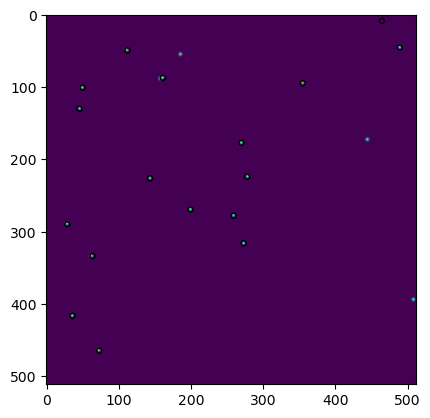

In [169]:
d = 7
df = gt.batch(pic, d, snr = 1.1, minmass_snr = 0.4, characterize = True, doughnut_correction = True, adaptive_background = 2, smoothing_size = 11)
gt.annotate_image(pic - bg, df, r = d/2)

In [100]:
merge = df.merge(parts, on = "particle", how = "outer")
print("false neg = ", merge["frame_x"].isna().sum())
print("false pos = ", merge["frame_y"].isna().sum())
len(merge) - merge["frame_x"].isna().sum() - merge["frame_y"].isna().sum()

false neg =  1
false pos =  11


19

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

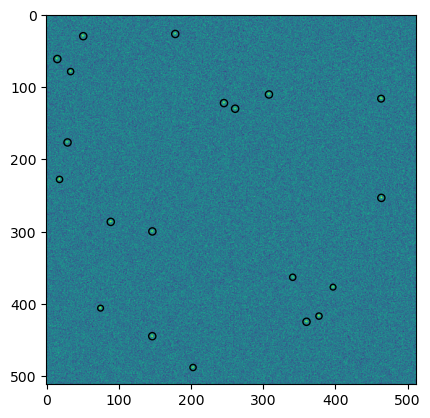

In [150]:
df = gt.LoG(pic, 4, 5, n_radii = 10, snr = 1.5, minmass_snr = 0.0, characterize = True, doughnut_correction = True, overlap_threshold = 0.3, adaptive_background = 5)
# df
gt.annotate_image(pic, df)
# gt.annotate_image(pic, pd.DataFrame())

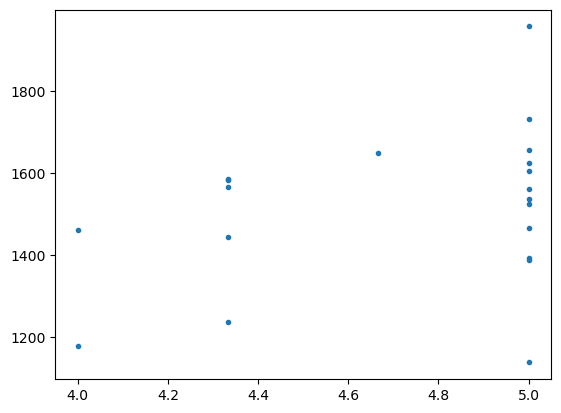

In [147]:
plt.plot(df["r"], df["raw_mass_corrected"], ".")

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

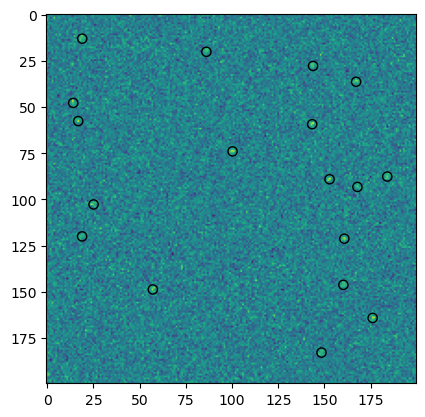

In [126]:
gt.annotate_image(pic, df, r = d/2)

In [80]:
df

,frame,y,x,mass,Rg,raw,signal,ecc,raw_mass,raw_bg_median,raw_mass_corrected


17


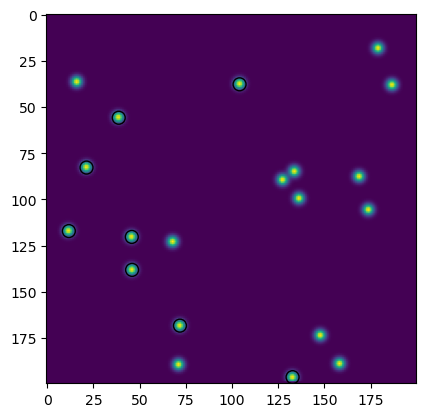

In [120]:
gt.
gpu_tracking.annotate_video(vid, df, r = d / 2, frame = 1)
print(len(df))

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

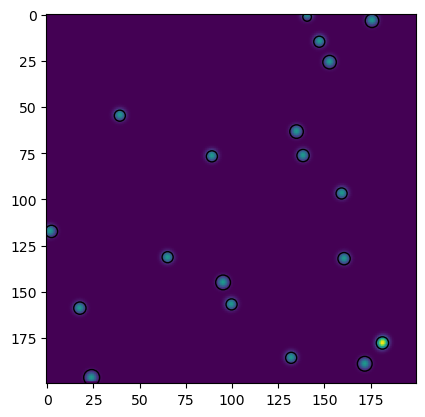

In [3]:
gpu_tracking.annotate_image(pic, gpu_tracking.LoG(pic[None, ...], min_r = 2, max_r = 5, minmass = 0, overlap_threshold = 0))

(array([72., 35., 15., 12.,  8.,  2.,  3.,  0.,  2.,  1.]),
 array([ 20.3460973 ,  39.84180089,  59.33750449,  78.83320808,
         98.32891168, 117.82461527, 137.32031887, 156.81602246,
        176.31172606, 195.80742965, 215.30313325]),
 <BarContainer object of 10 artists>)

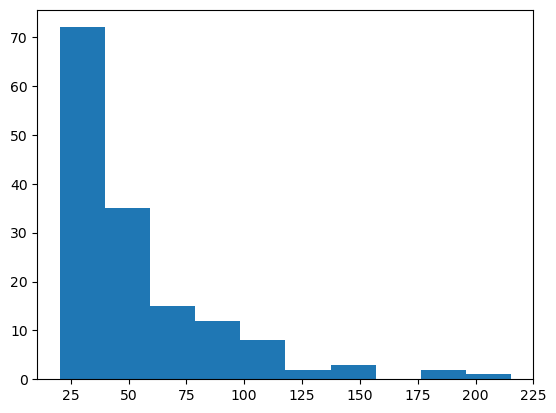

In [43]:
intensities = np.random.exponential(30, size = parts.shape[0]) + 20
plt.hist(intensities)

In [ ]:
d = 7
df = tp.locate(pic[None, ...], d)
df["frame"] = 0
gpu_tracking.annotate_image(pic, df, r = d / 2)